In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of differential equations (for the vector field)
def system(x, y, lambda_val):
    dx_dt = 1/2*(-3*x**3 - 3*x*(1+y**2)-np.sqrt(6)*lambda_val*y**2)
    dy_dt = -1/2*y*(3*x**2+3*(y**2-1)+np.sqrt(6)*lambda_val*x)
    return dx_dt, dy_dt

In [2]:
#grid for the vector field
x = np.linspace(-2, 2, 2000)  # Reduced resolution for less density
y = np.linspace(0, 2, 2000)
X, Y = np.meshgrid(x, y)

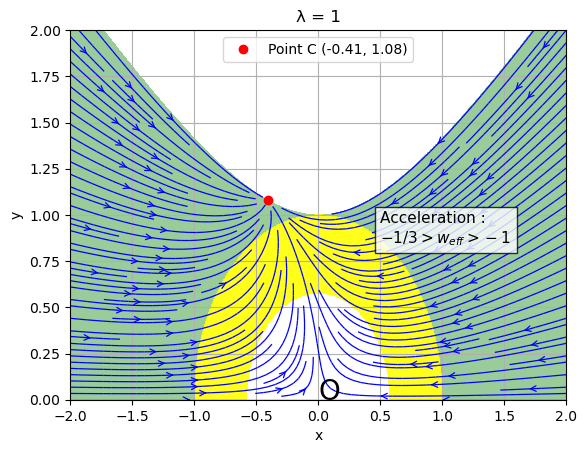

In [3]:
lambda_val = 1
    # Compute the critical point D for the current lambda
x_c = -lambda_val / np.sqrt(6)
y_c = np.sqrt(1 + (lambda_val**2) / 6)  # Ensure y_c is real

    # Compute the vector field
U, V = system(X, Y, lambda_val)

    # Mask points outside the semicircle
mask = -X**2 + Y**2 <= 1
U = np.where(mask, U, np.nan)
V = np.where(mask, V, np.nan)

    # Plot the streamlines with direction vectors
plt.streamplot(X, Y, U, V, density=2, color='b', linewidth=0.9, arrowsize=1, arrowstyle='->')

    # Plot the semicircle boundary
#plt.plot(x_circle, y_circle, 'k-', linewidth=2)

    # Plot the critical point D
plt.plot(x_c, y_c, 'ro', label=f'Point C ({x_c:.2f}, {y_c:.2f})')
#plt.text(0.18,0.87, 'C', fontsize=20)
    
w_m = 0
w_eff = -X**2 - Y**2 
accln_reg = (w_eff > -1) &(w_eff < -1/3)& (Y>0)& (-X**2 + Y**2 <=1)
phantom_reg = (-X**2 + Y**2 <=1) & (w_eff <= -1)
plt.contourf(X,Y,phantom_reg,levels=[0.5,1.5],colors='green',alpha=0.4)
plt.contourf(X,Y,accln_reg, levels = [0.5,1.5],colors = 'yellow',alpha =0.9)
plt.text(0.5,0.85,'Acceleration :\n$-1/3 > w_{{eff}}>-1$',
            fontsize=11,bbox = dict(facecolor='white',alpha=0.8))
    
# Set labels and limits
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-2, 2])
plt.ylim([0, 2])
plt.grid(True)
plt.legend()
plt.title(f'λ = {lambda_val}')
plt.text(0,0,'O',size=20)
plt.savefig(f'lambda{lambda_val}.png')
plt.show() 

/tmp/ipykernel_30452/2646575661.py:37: UserWarning: The following kwargs were not used by contour: 'hatch'
  ax.contourf(X, Y, phantom_reg, levels=[0.5, 1.5], colors='darkgreen', alpha=0.3, hatch='//')
/tmp/ipykernel_30452/2646575661.py:38: UserWarning: The following kwargs were not used by contour: 'hatch'
  ax.contourf(X, Y, accln_reg, levels=[0.5, 1.5], colors='gold', alpha=0.6, hatch='\\\\')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


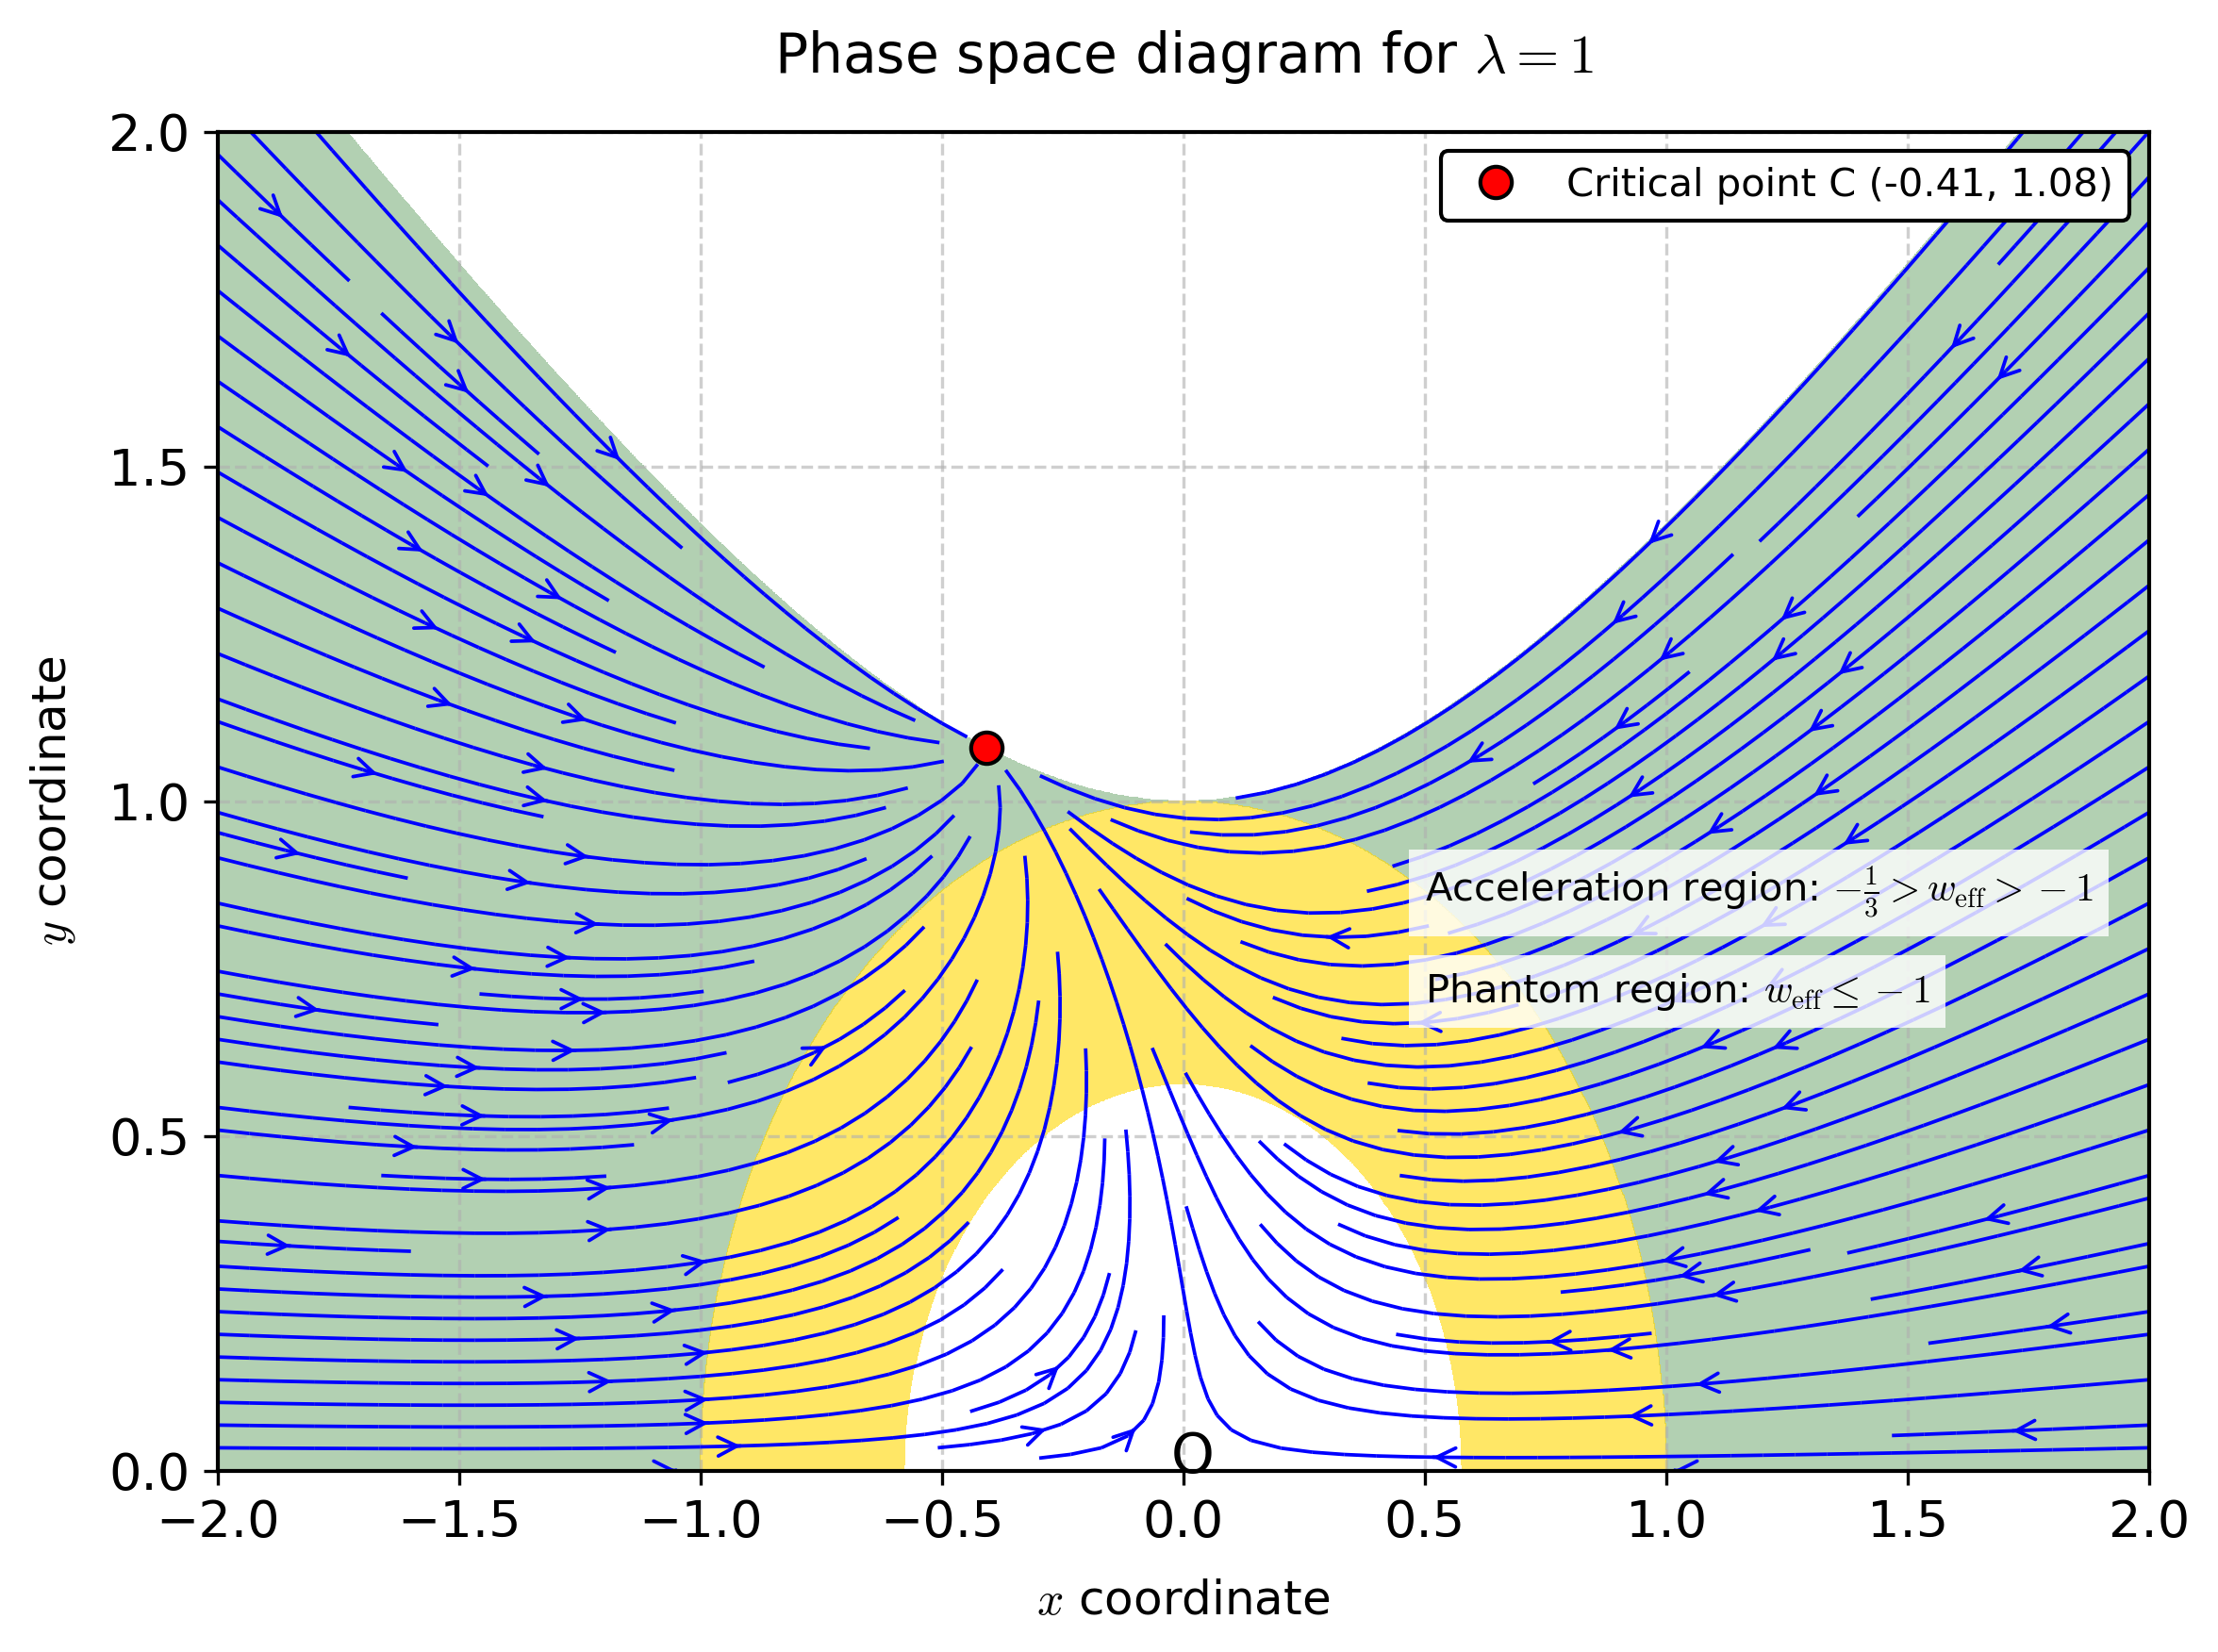

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Set publication-quality parameters
plt.rcParams.update({
    'font.size': 12,
    'mathtext.fontset': 'cm',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'legend.fontsize': 10,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.autolayout': True,
    'axes.linewidth': 1.0,
    'lines.linewidth': 1.5
})

# Create figure with appropriate size
fig, ax = plt.subplots(figsize=(8, 6))  # 6x5 inches is a common journal size

# Streamplot (assuming X, Y, U, V are defined)
stream = ax.streamplot(X, Y, U, V, density=2, color='b', linewidth=0.9, 
                      arrowsize=1.2, arrowstyle='->')

# Plot critical point
ax.plot(x_c, y_c, 'ro', markersize=8, markeredgecolor='k', 
        label=f'Critical point C ({x_c:.2f}, {y_c:.2f})')

# Regions
w_eff = -X**2 - Y**2 
accln_reg = (w_eff > -1) & (w_eff < -1/3) & (Y > 0) & (-X**2 + Y**2 <= 1)
phantom_reg = (-X**2 + Y**2 <= 1) & (w_eff <= -1)

# Use proper colormaps and hatching for regions
ax.contourf(X, Y, phantom_reg, levels=[0.5, 1.5], colors='darkgreen', alpha=0.3, hatch='//')
ax.contourf(X, Y, accln_reg, levels=[0.5, 1.5], colors='gold', alpha=0.6, hatch='\\\\')

# Add region labels with proper mathematical formatting
ax.text(0.5, 0.85, r'Acceleration region: $-\frac{1}{3} > w_{\mathrm{eff}} > -1$',
        fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax.text(0.5, 0.7, r'Phantom region: $w_{\mathrm{eff}} \leq -1$',
        fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Axis labels with proper formatting
ax.set_xlabel(r'$x$ coordinate', labelpad=8)
ax.set_ylabel(r'$y$ coordinate', labelpad=8)

# Set limits and ticks
ax.set_xlim([-2, 2])
ax.set_ylim([0, 2])
ax.set_xticks(np.arange(-2, 2.5, 0.5))
ax.set_yticks(np.arange(0, 2.5, 0.5))

# Grid and legend
ax.grid(True, linestyle='--', alpha=0.6)
legend = ax.legend(loc='upper right', framealpha=1, frameon=True)
legend.get_frame().set_edgecolor('k')

# Title with proper math formatting
ax.set_title(r'Phase space diagram for $\lambda = {}$'.format(lambda_val), pad=15)

# Origin label
ax.text(0.02, 0.02, 'O', size=14, ha='center', va='center')

# Add colorbar if needed (example)
# cbar = plt.colorbar(stream.lines)
# cbar.set_label('Velocity magnitude')

# Save in multiple formats
plt.savefig(f'lambda{lambda_val}phantom.pdf', bbox_inches='tight')  # Vector format for publications
plt.savefig(f'lambda{lambda_val}phantom.png', bbox_inches='tight')  # Raster format
plt.savefig(f'lambda{lambda_val}phantom.eps', bbox_inches='tight')  # For some journals

plt.show()